In [2]:
# 경고 메시지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차 검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Embedding
from keras.layers import LSTM

# 다중분류를 위한 핫-윈 인코더
from keras.utils import to_categorical

# 저장된 딥러닝 모델을 복구하는 함수
from keras.models import load_model

# epoch마다 모델을 저장하는 함수
from keras.callbacks import ModelCheckpoint

# 더이상 성능 향상이 이루어지지 않는다면 조기 중단시킬 수 있는 함수
from keras.callbacks import EarlyStopping

# 문장을 잘라준다.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# gpu 사용 초기화 및 할당
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
# seed값 설정

np.random.seed(3)
tf.random.set_seed(3)

In [7]:
# 로이터 데이터 불러오기
from keras.datasets import reuters

(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2) # 사용 빈도수가 높은 단어 100개 추출

In [13]:
# 데이터 확인
# 카테고리 개수

a1 = np.max(Y_train) + 1
print(f'카테고리 개수 : {a1}')

# 학습용 뉴스 기사 개수
a2 = len(X_train)
print(f'학습용 뉴스 기사 개수 : {a2}')

# 테스트용 뉴스 기사 개수
a3 = len(X_test)
print(f'테스트용 뉴스 기사 개수 : {a3}')

print(X_train[0])

카테고리 개수 : 46
학습용 뉴스 기사 개수 : 8982
테스트용 뉴스 기사 개수 : 2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [14]:
# 서로 개수가 다른 뉴스기사 리스트의 원소의 개수를 똑같이 맞춰준다
# 부족한 부분은 0으로 채워준다
X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)

In [15]:
# 결과 데이터를 원-핫 인코딩한다
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

Y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
# 모델 설정
model = Sequential()
# 문장당 최대 1000개의 데이터를 100개로 줄여라~
model.add(Embedding(1000, 100))
# RNN(LSTM)을 이용한 학습
model.add(LSTM(100, activation='tanh'))
# 출력층
model.add(Dense(46, activation='softmax'))

In [17]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [18]:
# 학습 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                   batch_size=100, epochs=20)


Epoch 1/20
90/90 [==============================] - 39s 381ms/step - loss: 2.9662 - accuracy: 0.3179 - val_loss: 2.1452 - val_accuracy: 0.4804
Epoch 2/20
90/90 [==============================] - 34s 380ms/step - loss: 2.0572 - accuracy: 0.4873 - val_loss: 1.9287 - val_accuracy: 0.5116
Epoch 3/20
90/90 [==============================] - 34s 381ms/step - loss: 1.8827 - accuracy: 0.5242 - val_loss: 1.8074 - val_accuracy: 0.5223
Epoch 4/20
90/90 [==============================] - 34s 382ms/step - loss: 1.7518 - accuracy: 0.5481 - val_loss: 1.8907 - val_accuracy: 0.5298
Epoch 5/20
90/90 [==============================] - 34s 382ms/step - loss: 1.8948 - accuracy: 0.5153 - val_loss: 1.7403 - val_accuracy: 0.5628
Epoch 6/20
90/90 [==============================] - 34s 381ms/step - loss: 1.6965 - accuracy: 0.5668 - val_loss: 1.6760 - val_accuracy: 0.5775
Epoch 7/20
90/90 [==============================] - 34s 383ms/step - loss: 1.6515 - accuracy: 0.5793 - val_loss: 1.6301 - val_accuracy: 0.5939

In [20]:
# 테스트 정확도 출력
model.evaluate(X_test, Y_test)[1]

# 테스트 데이터의 오차
y_vloss = history.history['val_loss']

# 학습 데이터의 오차
y_loss = history.history['loss']

# 테스트 데이터의 오차
y_vloss = history.history['val_loss']

71/71 [==============================] - 1s 19ms/step - loss: 2.0794 - accuracy: 0.4951


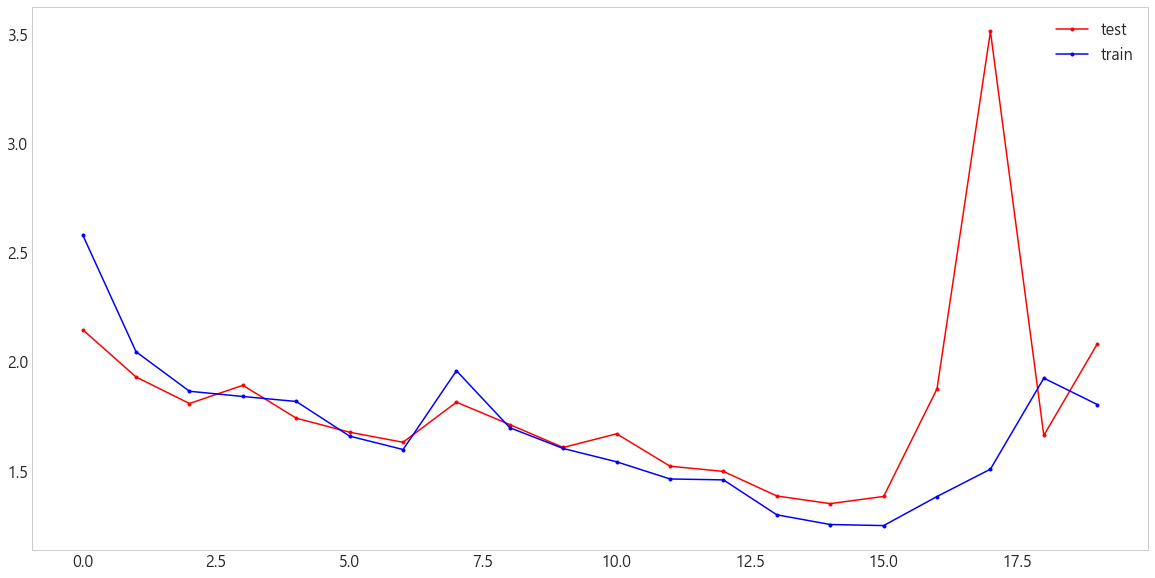

In [21]:
# 그래프
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='test')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train')

plt.legend()
plt.grid()
plt.show()